This Notebook directly uses cleaned data
Following things have been done in cleaning process:


1.   Removed Punctuation marks
2.   Removed Stopwords
3.   Removed links, urls, html tags, etc
4.   Stemming: Conversion to root form (for ex. cleaning -> clean)



In [3]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
df = pd.read_csv('cleaned_data.csv')
df.head()

NameError: name 'pd' is not defined

In [4]:
'''
 here we are calculating the word length for each complaint
 The motivation is to check if all complaints are of similar length
 if there is imbalance in length of the complaints we may revisit our statergy of oversampling
'''
df['text_length_words'] = df['complaint'].apply(lambda x: len(x.split()))
df['text_length_chars'] = df['complaint'].apply(len)

df.head()

,id,category,complaint,text_length_words,text_length_chars
0,0,credit_card,purchas order day ship amount receiv product w...,230,1471
1,1,credit_card,forward messag date tue subject pleas investig...,132,800
2,2,retail_banking,forward messag cc sent friday pdt subject fina...,173,1076
3,3,credit_reporting,payment histori miss credit report special loa...,131,790
4,4,credit_reporting,payment histori miss credit report made mistak...,123,752


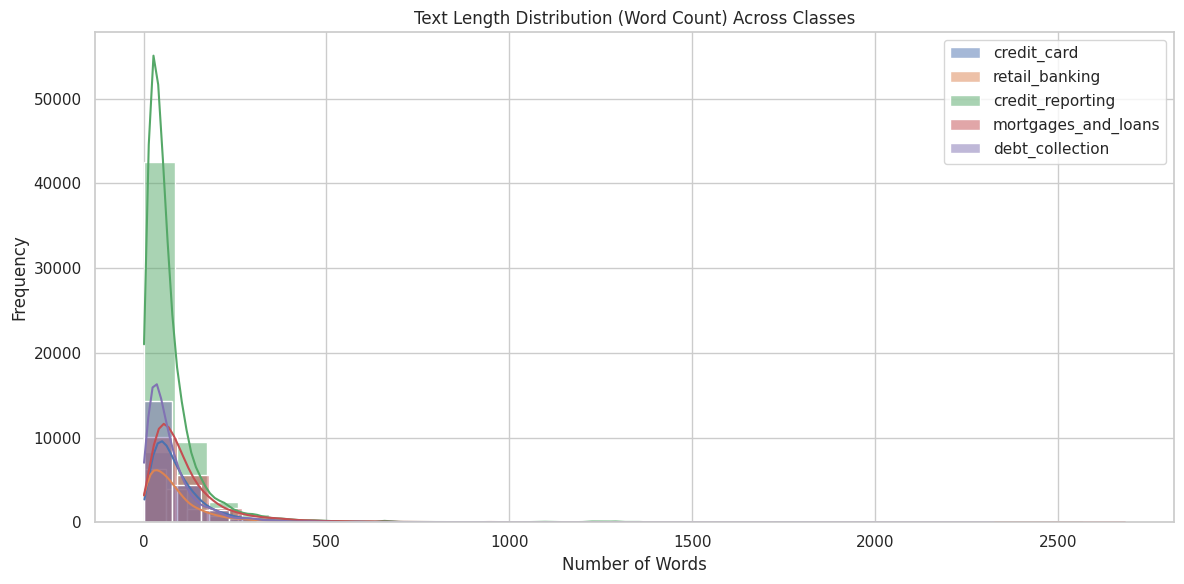

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
for label in df['category'].unique():
    sns.histplot(df[df['category'] == label]['text_length_words'], bins=30, label=label, kde=True)

plt.title('Text Length Distribution (Word Count) Across Classes')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

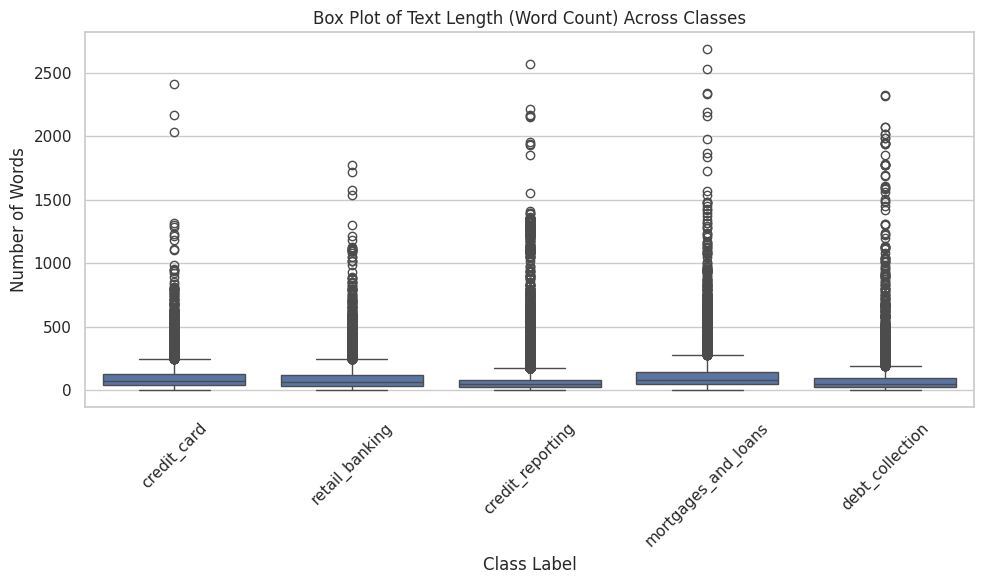

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='text_length_words', data=df)
plt.title('Box Plot of Text Length (Word Count) Across Classes')
plt.xlabel('Class Label')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['complaint'])
feature_names = vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df.head()

,aa,aadvantag,aaf,aag,aargon,ab,abandon,abbrevi,abet,abid,...,york,youll,young,your,youv,yr,zell,zero,zip,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


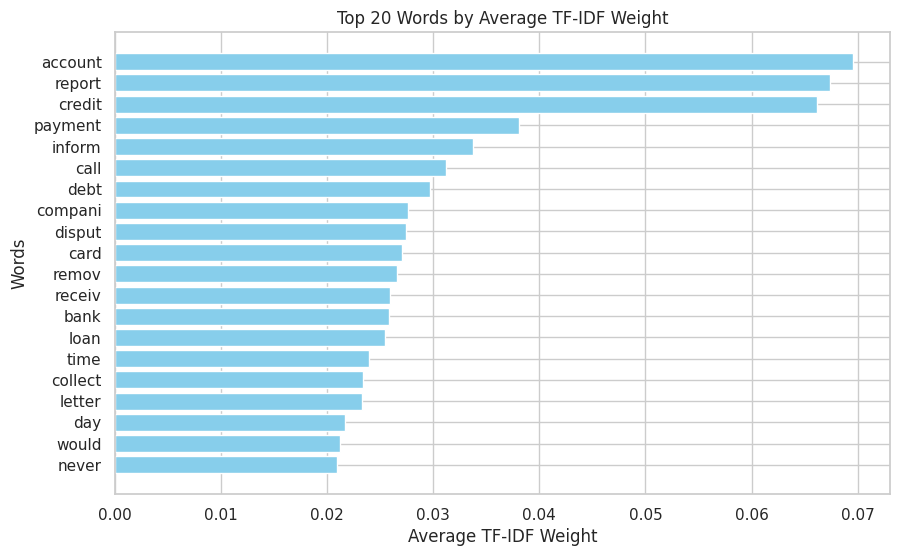

In [10]:
tfidf_weights = X_tfidf.mean(axis=0).A1
tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_weight': tfidf_weights})

tfidf_df = tfidf_df.sort_values(by='tfidf_weight', ascending=False).head(20)  # Top 20 words

plt.figure(figsize=(10, 6))
plt.barh(tfidf_df['word'], tfidf_df['tfidf_weight'], color='skyblue')
plt.xlabel('Average TF-IDF Weight')
plt.ylabel('Words')
plt.title('Top 20 Words by Average TF-IDF Weight')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest weight on top
plt.show()

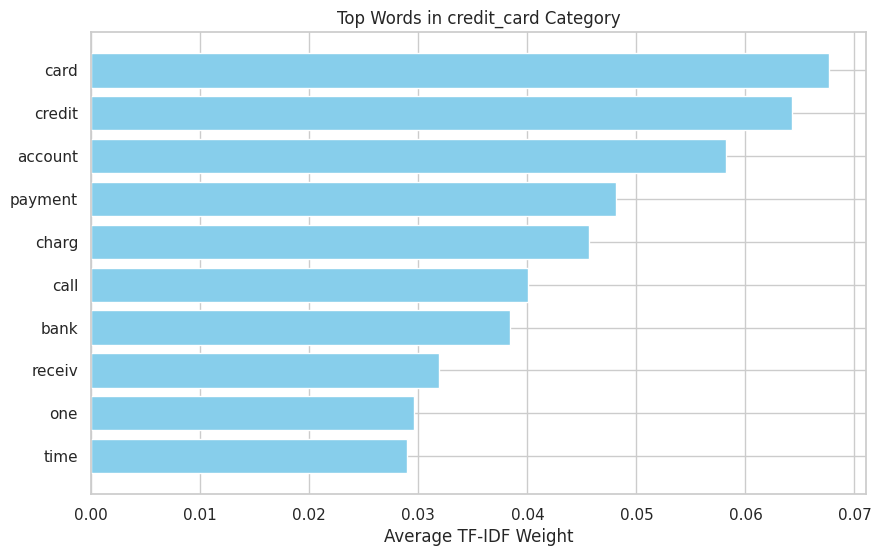

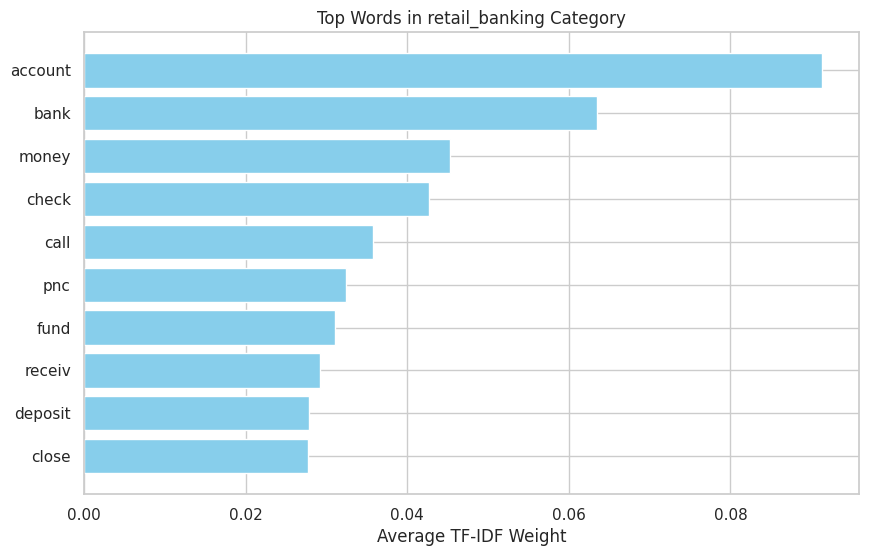

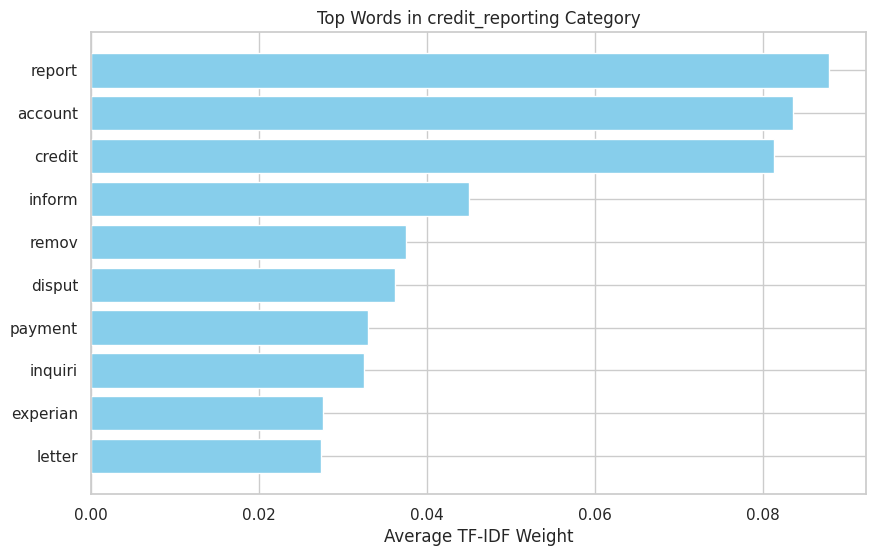

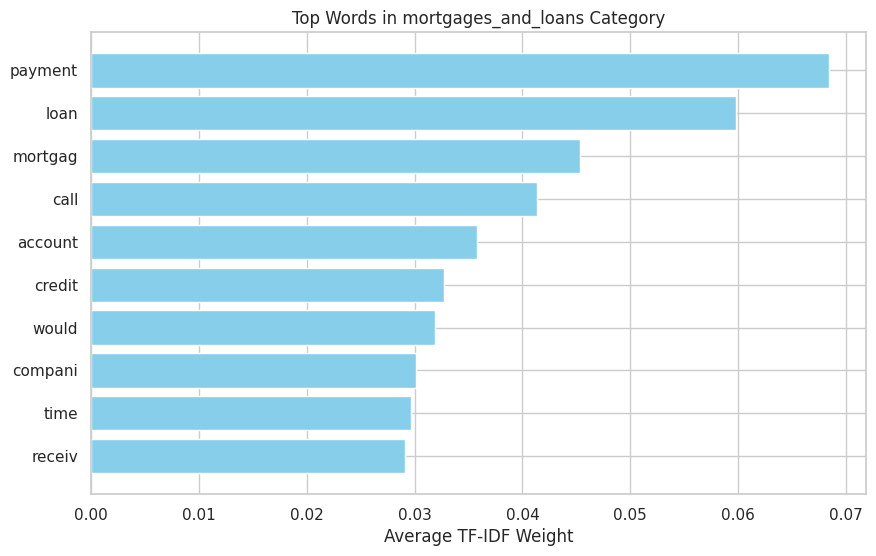

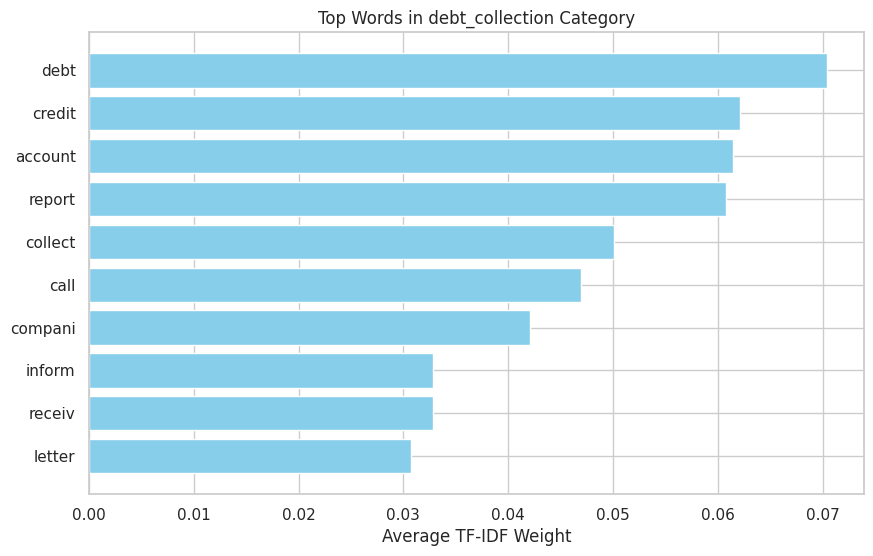

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(max_features=5000)

top_words_per_category = {}

for category in df['category'].unique():
    category_text = df[df['category'] == category]['complaint']

    X_tfidf = vectorizer.fit_transform(category_text)
    feature_names = vectorizer.get_feature_names_out()

    tfidf_weights = X_tfidf.mean(axis=0).A1  # Convert to a 1D array
    tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_weight': tfidf_weights})

    top_words = tfidf_df.sort_values(by='tfidf_weight', ascending=False).head(10)

    top_words_per_category[category] = top_words

for category, top_words in top_words_per_category.items():
    plt.figure(figsize=(10, 6))
    plt.barh(top_words['word'], top_words['tfidf_weight'], color='skyblue')
    plt.xlabel('Average TF-IDF Weight')
    plt.title(f'Top Words in {category} Category')
    plt.gca().invert_yaxis()
    plt.show()


In [15]:
# I noticed that there are lot of xxxx.. kind of expressions people have used to hide sensitive info it is wise decision to remove it

df['complaint'] = df['complaint'].str.replace(r'x+\s', '', regex=True)

In [16]:
from sklearn.model_selection import train_test_split

X = df['complaint']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

45044    submit person inform venmo email numer time fi...
36356    loan origin creditor bull citi origin creditor...
91766    pnc wont let transfer money app doesnt work tr...
79484    ed ad derogatori mark credit report per accoun...
34240    contact santand consum usa file extens account...
Name: complaint, dtype: object
45044         retail_banking
36356       credit_reporting
91766         retail_banking
79484    mortgages_and_loans
34240       credit_reporting
Name: category, dtype: object


In [17]:
# Trying ngram approach for vectorization as words like account and credit are common in most of the categories

vectorizer_2 = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

X_train_tfidf = vectorizer_2.fit_transform(X_train)
X_test_tfidf = vectorizer_2.transform(X_test)

print(f'Training TF-IDF shape: {X_train_tfidf.shape}')
print(f'Test TF-IDF shape: {X_test_tfidf.shape}')

Training TF-IDF shape: (99577, 5000)
Test TF-IDF shape: (24895, 5000)


# Logistic Regression (without resampling)

time taken: 38s, **accuracy: 85.00%**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8500
Classification Report:
                     precision    recall  f1-score   support

        credit_card       0.81      0.79      0.80      2992
   credit_reporting       0.87      0.90      0.88     11359
    debt_collection       0.80      0.74      0.77      4149
mortgages_and_loans       0.85      0.85      0.85      3684
     retail_banking       0.87      0.89      0.88      2711

           accuracy                           0.85     24895
          macro avg       0.84      0.83      0.84     24895
       weighted avg       0.85      0.85      0.85     24895



# Xgboost (without resampling)
time taken: 7 mins, accuracy: 85.20%

In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_tfidf, y_train_encoded)
y_pred_encoded = xgb_classifier.predict(X_test_tfidf)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_score(y_test_encoded, y_pred_encoded, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_encoded, y_pred_encoded)}")

Accuracy: 0.852018477605945
F1 Score: 0.851173604916301
Confusion Matrix:
[[ 2346   339    72    49   186]
 [  210 10292   556   241    60]
 [   94   757  3126   142    30]
 [   43   381   113  3077    70]
 [  199    78    23    41  2370]]


# Random Forest Classifier (without resampling)

time taken: 12mins, accuracy: 85.19%

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini')
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [23]:
y_pred_rf = rf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")

Accuracy: 0.851897971480217
F1 Score: 0.8492503536667878


# **RESAMPLING**

# 1. ADASYN

In [26]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42, sampling_strategy='auto')

X_resampled, y_resampled = adasyn.fit_resample(X_train_tfidf, y_train)
print(pd.Series(y_resampled).value_counts())

category
credit_card            45936
credit_reporting       44881
mortgages_and_loans    44605
retail_banking         44414
debt_collection        40095
Name: count, dtype: int64


<ipython-input-27-6bf23cae64bb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
<ipython-input-27-6bf23cae64bb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


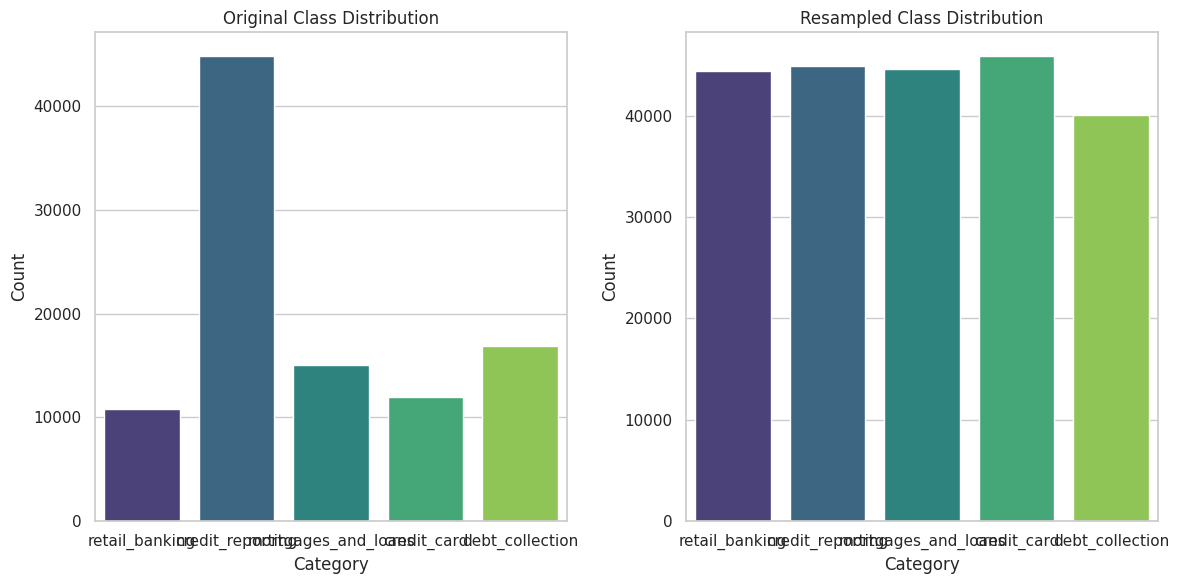

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title('Original Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Resampled Class Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [30]:
lr = LogisticRegression(max_iter=1200)

lr.fit(X_resampled, y_resampled)

y_pred_lr_resampled = lr.predict(X_test_tfidf)

In [31]:

accuracy = accuracy_score(y_test, y_pred_lr_resampled)
report = classification_report(y_test, y_pred_lr_resampled)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8340
Classification Report:
                     precision    recall  f1-score   support

        credit_card       0.75      0.82      0.78      2992
   credit_reporting       0.92      0.82      0.87     11359
    debt_collection       0.74      0.80      0.77      4149
mortgages_and_loans       0.79      0.87      0.83      3684
     retail_banking       0.84      0.90      0.87      2711

           accuracy                           0.83     24895
          macro avg       0.81      0.84      0.82     24895
       weighted avg       0.84      0.83      0.84     24895



As we can see just randomly oversampling did not help we need to use specific techniques in order to improve the accuracy

In [ ]:
# Incomplete due to time contraint

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter

original_distribution = Counter(y_train)
print("Original distribution:", original_distribution)

sampling_strategy = {
    'credit_reporting': original_distribution['credit_reporting'],
    'debt_collection': 35000,
    'mortgages_and_loans': 35000,
    'credit_card': 35000,
    'retail_banking': 35000
}

smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy)
X_resampled_smote, y_resampled_smote = smote_tomek.fit_resample(X_train_tfidf, y_train)

new_distribution = Counter(y_resampled_smote)
print("New distribution:", new_distribution)

Original distribution: Counter({'credit_reporting': 44881, 'debt_collection': 16908, 'mortgages_and_loans': 15039, 'credit_card': 11991, 'retail_banking': 10758})
